TensorFlow 1.x selected.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 163 samples, validate on 71 samples
Epoch 1/1000
163/163 [==============================] - 2s 11ms/sample - loss: 0.6911 - acc: 0.6994 - val_loss: 0.6900 - val_acc: 0.6620
Epoch 2/1000
163/163 [==============================] - 0s 563us/sample - loss: 0.6863 - acc: 0.7239 - val_loss: 0.6863 - val_acc: 0.6620
Epoch 3/1000
163/163 [==============================] - 0s 551us/sample - loss: 0.6803 - acc: 0.7239 - val_loss: 0.6818 - val_acc: 0.6620
Epoch 4/1000
163/163 [==============================] - 0s 557us/sample - loss: 0.6727 - acc: 0.7239 - val_loss: 0.6751 - val_acc: 0.6620
Epoch 5/1000
163/163 [==============================] - 0s 628us/sample - loss: 0.6591 - acc: 0.7239 - val_loss: 0.6603 - val_acc: 0.6620
Epoch 6/1000
163/163 [==============================] - 0s 580us/sample - loss: 0.6250 - acc: 0.7239 - val_loss: 0.6225 - val_acc: 0.6620
Epoch 7/1000
163/163 [============

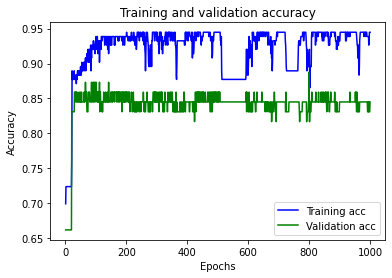

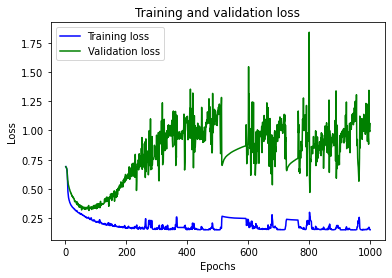

In [1]:
%tensorflow_version 1.x
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("/content/data.csv")

x= dataset.iloc[:,2:8].values
y= dataset.iloc[:,8].values

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#!pip install sklearn
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
#imputer=imputer.fit(x[:,2:8])
#x[:,2:8]=imputer.transform(x[:,2:8])

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(x[:,2:8])
x[:,2:8]=imputer.transform(x[:,2:8])

import keras
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential

classifier=Sequential()

classifier.add(Dense(12, kernel_initializer='random_uniform', activation='relu', input_dim=6))

classifier.add(Dense(12, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(12, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(8, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(6, kernel_initializer='random_uniform', activation='relu')) 

classifier.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid')) 

#classifier.add(BatchNormalization())

#classifier.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])
#classifier.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['accuracy'])

history = classifier.fit(x_train,y_train,validation_data=(x_test, y_test),batch_size=8,epochs=1000)

#history = classifier.fit(x_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

y_pred=classifier.predict(np.array(x_test))
#y_pred=classifier.predict(x_test)
#y_pred=(y_pred>0.5)
#y_test=(y_test>0.5)

# Plotting Results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()


In [2]:
classifier.evaluate(x_train,y_train)

163/163 [==============================] - 0s 99us/sample - loss: 0.1499 - acc: 0.9448


[0.14994819997095624, 0.9447853]

In [3]:
classifier.evaluate(x_test,y_test)

71/71 [==============================] - 0s 133us/sample - loss: 1.0587 - acc: 0.8451


[1.05871732302115, 0.8450704]

In [4]:
data=dataset.iloc[:,:].values
pd.DataFrame(data).isnull().any()
pd.DataFrame(data).isnull().sum()
#pd.DataFrame(data).notnull().any()
#pd.DataFrame(data).notnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [8]:
print(classifier.predict(np.array([[0.896,0.083,2.07,0.048,2.386,0.008]]))>0.5)


[[ True]]


In [9]:
print(classifier.predict(np.array([[0.00896,0.0083,0.07,0.048,0.386,0.008]]))>0.5)

[[ True]]


In [10]:
print(classifier.predict(np.array([[2.899,0.087,1.282,0.06,1.544,0.015]]))>0.5)


[[ True]]
